# ABBA-BABA tests in *Canarium*

### import libraries

In [1]:
import ipyrad as ip
import ipyparallel as ipp
import pandas as pd
import numpy as np
from ipyrad.analysis import baba

### Spin up a cluster

In [2]:
## connect to ipcluster parallel client
ipyclient = ipp.Client()
print ip.cluster_info()

  host compute node: [4 cores] on oud


### The *ipyrad* min4 loci input file

In [3]:
handle = "/home/deren/Documents/Canarium-GBS/CanEnd_outfiles/CanEnd.loci"
newick = "/home/deren/Dropbox/Canarium_GBS/ipyrad/analysis_raxml/RAxML_bestTree.Can2_tree"

In [4]:
tre = baba.Tree(newick)
tre.draw(height=300, use_edge_lengths=False, 
         vlshow=False, vsize=0, yaxis=True);

0 5 10 
 
 
 Save as .csv

### A dictionary mapping samples to clades

In [5]:
tree = {
    
    "OG": ["D14269", "D13374", "SFC1988", "D13852"],
    
    "K1": ["SF328", "SF175", "SF200", "D13052", "SF209", 
           "SF172", "D14528", "SF286", "SF276"],
    
    "K2": ["D14483", "D14482", "D13101", "D13103"],
    
    "K3": ["D14504", "D14506", "D14505"],
    
    "K4": ["D14501", "D14478", "D14480", "D14513", "D14477"],
    
    "K5": ["D13090", "D12950"],
    
    "K6": ["D12963", "SF155", "SF224", "SF228", "5573", 
           "SF327", "SF160", "SF153", "SF164", "SF197", 
           "D13097", "D13075", "D13063", "D13053"],
}

In [6]:
### Dictionaries for storing results
rdict = {}
bdict = {}

## Create tests as a dictionary
The list below (`tests_K1`) records the tests we plan to evaluate. Each test is described by a dictionary in which the keys designate tips in the abba/baba test (e.g., p1, p2, p3, p4), and the values are a list of Sample names to represent each tip. For example, p4 is the outgroup, which here is the list described by `tree["OG"]` above. Using dictionaries in this way makes writing the tests a bit cleaner and easier to read.  

### Setup tests: K1 -> x

In [7]:
tests_K1 = [
    {
     'p4': tree["OG"],
     'p3': tree["K1"],
     'p2': tree["K2"],
     'p1': tree["K3"],
    },  
    
    {
    'p4': tree["OG"],
    'p3': tree["K1"],
    'p2': tree["K2"],
    'p1': tree["K4"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K1"],
    'p2': tree["K3"],
    'p1': tree["K4"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K1"],
    'p2': tree["K2"],
    'p1': tree["K3"] + tree["K4"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K1"],
    'p2': tree["K5"],
    'p1': tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K1"],
    'p2': tree["K2"] + tree["K3"] + tree["K4"],
    'p1': tree["K5"] + tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K1"],
    'p2': tree["K2"],
    'p1': tree["K5"] + tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K1"],
    'p2': tree["K3"],
    'p1': tree["K5"] + tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K1"],
    'p2': tree["K4"],
    'p1': tree["K5"] + tree["K6"],
    }, 
]

## mindicts
min4 = {i:4 for i in ['p1', 'p2', 'p3', 'p4']}
min3 = {i:3 for i in ['p1', 'p2', 'p3', 'p4']}
min2 = {i:2 for i in ['p1', 'p2', 'p3', 'p4']}

  [####################] 100%  calculating D-stats  | 0:04:47 |  


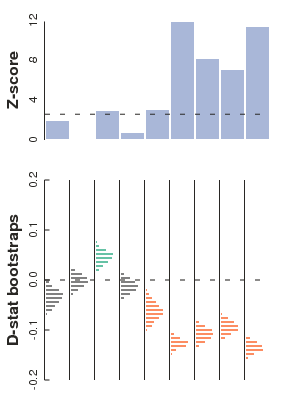

In [10]:
## run the tests with the default mindict (min1)
rdict["K1"], bdict["K1"] = baba.batch(handle, tests_K1, None, 1000, ipyclient)
baba.bootplot(rdict["K1"], bdict["K1"], width=300, alpha=0.01)

### Run the tests in `tests_K1`
The function `baba.batch()` runs many jobs in parallel. It returns two objects, a DataFrame with a summary of results, and an array with d-stat values of the bootstrap replicates. The latter is useful for plotting as you will see below. 

  [####################] 100%  calculating D-stats  | 0:03:01 |  


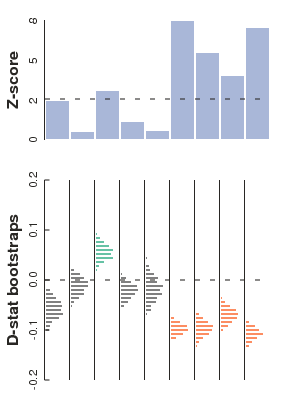

In [9]:
## run the tests
rdict["K1m2"], bdict["K1m2"] = baba.batch(handle, tests_K1, min2, 1000, ipyclient)
baba.bootplot(rdict["K1m2"], bdict["K1m2"], width=300, alpha=0.01)

### Setup tests (K2, K3, K4) -> x

In [11]:
tests_K2 = [
    {
    'p4': tree["OG"],
    'p3': tree["K2"] + tree["K3"] + tree["K4"],
    'p2': tree["K5"],
    'p1': tree["K6"],
    },  
    
    {
    'p4': tree["OG"],
    'p3': tree["K3"] + tree["K4"],
    'p2': tree["K5"],
    'p1': tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K2"],
    'p2': tree["K5"],
    'p1': tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K3"],
    'p2': tree["K5"],
    'p1': tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K4"],
    'p2': tree["K5"],
    'p1': tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K2"] + tree["K3"] + tree["K4"],
    'p2': tree["K1"][:3],
    'p1': tree["K1"][3:],
    },  
    
    {
    'p4': tree["OG"],
    'p3': tree["K3"] + tree["K4"],
    'p2': tree["K1"][:3],
    'p1': tree["K1"][3:],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K2"],
    'p2': tree["K1"][:3],
    'p1': tree["K1"][3:],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K3"],
    'p2': tree["K1"][:3],
    'p1': tree["K1"][3:],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K4"],
    'p2': tree["K1"][:3],
    'p1': tree["K1"][3:],
    }, 
]

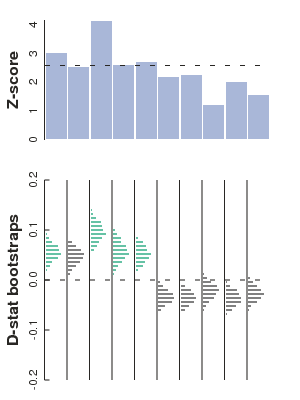

In [63]:
## run the tests
#rdict["K2"], bdict["K2"] = baba.batch(handle, tests_K2, None, 1000, ipyclient)
baba.bootplot(rdict["K2"], bdict["K2"], width=300, alpha=0.01)

  [####################] 100%  calculating D-stats  | 0:02:34 |  


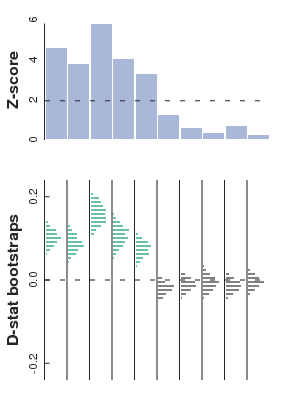

In [15]:
## run the tests
rdict["K2m2"], bdict["K2m2"] = baba.batch(handle, tests_K2, min2, 1000, ipyclient)
baba.bootplot(rdict["K2m2"], bdict["K2m2"], width=300)

### Setup tests (K5,K6) -> x

In [16]:
tests_K3 = [
    {
    'p4': tree["OG"],
    'p3': tree["K5"] + tree["K6"],
    'p2': tree["K1"][:3],
    'p1': tree["K1"][3:],
    },  
    
    {
    'p4': tree["OG"],
    'p3': tree["K5"],
    'p2': tree["K1"][:3],
    'p1': tree["K1"][3:],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K6"],
    'p2': tree["K1"][:3],
    'p1': tree["K1"][3:],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K5"] + tree["K6"],
    'p2': tree["K2"],
    'p1': tree["K3"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K5"] + tree["K6"],
    'p2': tree["K2"],
    'p1': tree["K4"],
    },
    
    {
    'p4': tree["OG"],
    'p3': tree["K5"] + tree["K6"],
    'p2': tree["K3"],
    'p1': tree["K4"],
    },  
    
    {
    'p4': tree["OG"],
    'p3': tree["K5"] + tree["K6"],
    'p2': tree["K2"],
    'p1': tree["K3"] + tree["K4"],
    },
]

  [####################] 100%  calculating D-stats  | 0:02:58 |  


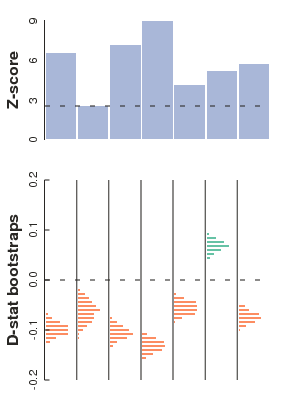

In [17]:
## run the tests
rdict["K3"], bdict["K3"] = baba.batch(handle, tests_K3, None, 1000, ipyclient)
baba.bootplot(rdict["K3"], bdict["K3"], width=300, alpha=0.01)

  [####################] 100%  calculating D-stats  | 0:02:15 |  


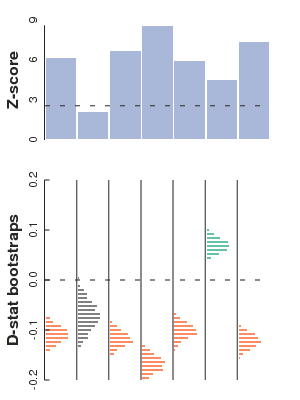

In [18]:
## run the tests
rdict["K3m2"], bdict["K3m2"] = baba.batch(handle, tests_K3, min2, 1000, ipyclient)
baba.bootplot(rdict["K3m2"], bdict["K3m2"], width=300, alpha=0.01)

### test K1 without SF172

In [19]:
## tests with p3=K1
tests_K1_S = [
    {
    'p4': tree["OG"],
    'p3': list(set(tree["K1"]) - set(["SF172"])),
    'p2': tree["K2"],
    'p1': tree["K3"],
    },  
    
    {
    'p4': tree["OG"],
    'p3': list(set(tree["K1"]) - set(["SF172"])),
    'p2': tree["K2"],
    'p1': tree["K4"],
    },
    
    {
    'p4': tree["OG"],
    'p3': list(set(tree["K1"]) - set(["SF172"])),
    'p2': tree["K3"],
    'p1': tree["K4"],
    },
    
    {
    'p4': tree["OG"],
    'p3': list(set(tree["K1"]) - set(["SF172"])),
    'p2': tree["K2"],
    'p1': tree["K3"] + tree["K4"],
    },
    
    {
    'p4': tree["OG"],
    'p3': list(set(tree["K1"]) - set(["SF172"])),
    'p2': tree["K5"],
    'p1': tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': list(set(tree["K1"]) - set(["SF172"])),
    'p2': tree["K2"] + tree["K3"] + tree["K4"],
    'p1': tree["K5"] + tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': list(set(tree["K1"]) - set(["SF172"])),
    'p2': tree["K2"],
    'p1': tree["K5"] + tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': list(set(tree["K1"]) - set(["SF172"])),
    'p2': tree["K3"],
    'p1': tree["K5"] + tree["K6"],
    },
    
    {
    'p4': tree["OG"],
    'p3': list(set(tree["K1"]) - set(["SF172"])),
    'p2': tree["K4"],
    'p1': tree["K5"] + tree["K6"],
    }, 
]

  [####################] 100%  calculating D-stats  | 0:04:05 |  


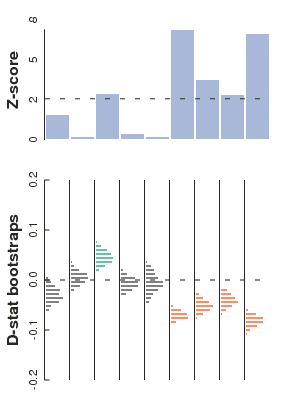

In [20]:
## run the tests
rdict["K1S"], bdict["K1S"] = baba.batch(handle, tests_K1_S, None, 1000, ipyclient)
baba.bootplot(rdict["K1S"], bdict["K1S"], width=300, alpha=0.01)

### five taxon tests

In [22]:
tests5 = [
    ## 56 into 234
    {
        "p5": tree["OG"],
        "p4": tree["K6"],
        "p3": tree["K5"],
        "p2": tree["K2"],
        "p1": tree["K3"] + tree["K4"]
    },
    {
        "p5": tree["OG"],
        "p4": tree["K6"],
        "p3": tree["K5"],
        "p2": tree["K3"],
        "p1": tree["K4"]
    },
    {
        "p5": tree["OG"],
        "p4": tree["K6"],
        "p3": tree["K5"],
        "p2": tree["K2"],
        "p1": tree["K4"]
    },
    
    ## 23 into 56
    {
        "p5": tree["OG"],
        "p4": tree["K2"],
        "p3": tree["K3"] + tree["K4"],
        "p2": tree["K5"],
        "p1": tree["K6"]
    }, 
    {
        "p5": tree["OG"],
        "p4": tree["K3"],
        "p3": tree["K4"],
        "p2": tree["K5"],
        "p1": tree["K6"]
    },    
    {
        "p5": tree["OG"],
        "p4": tree["K2"],
        "p3": tree["K4"],
        "p2": tree["K5"],
        "p1": tree["K6"]
    },    
    
    ## 56 into 1
    {
        "p5": tree["OG"],
        "p4": tree["K5"],
        "p3": tree["K6"],
        "p2": tree["K1"][:3],
        "p1": tree["K1"][3:],
    },     
    ## 1 into 56
    {
        "p5": tree["OG"],
        "p4": tree["K1"][:3],
        "p3": tree["K1"][3:],
        "p2": tree["K5"],
        "p1": tree["K6"],
    },
    ## 234 into 1
    {
        "p5": tree["OG"],
        "p4": tree["K2"],
        "p3": tree["K3"] + tree["K4"],
        "p2": tree["K1"][:3],
        "p1": tree["K1"][3:],
    },        
    {
        "p5": tree["OG"],
        "p4": tree["K3"],
        "p3": tree["K4"],
        "p2": tree["K1"][:3],
        "p1": tree["K1"][3:],
    },   
    {
        "p5": tree["OG"],
        "p4": tree["K2"],
        "p3": tree["K4"],
        "p2": tree["K1"][:3],
        "p1": tree["K1"][3:],
    },   
    ## 1 into 234
    {
        "p5": tree["OG"],
        "p4": tree["K1"][:3],
        "p3": tree["K1"][3:],
        "p2": tree["K2"],
        "p1": tree["K3"] + tree["K4"],
    },
    {
        "p5": tree["OG"],
        "p4": tree["K1"][:3],
        "p3": tree["K1"][3:],
        "p2": tree["K2"],
        "p1": tree["K4"],
    },
    {
        "p5": tree["OG"],
        "p4": tree["K1"][:3],
        "p3": tree["K1"][3:],
        "p2": tree["K3"],
        "p1": tree["K4"],
    },
]

### (6,5) into (2,3,4)
Test 1: (6,5),(2,34) shows that (6,5) and (6) share more alleles with 34.

In [23]:
r, b = baba.baba(handle, tests5[0], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3      0.014884  0.014197  0.044072  117.547811  114.099975  0.337721
p4     -0.136973 -0.135956  0.029056  178.815831  235.576464  4.714173
shared -0.123482 -0.122702  0.017400  600.430351  769.605361  7.096764


Test 2: (6,5),(3,4) shows that **neither** (6) or (5) share more alleles with 3 than 4.

In [24]:
r, b = baba.baba(handle, tests5[1], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3      0.020573  0.020171  0.048261  103.793924   99.609288  0.426285
p4     -0.016166 -0.016372  0.028560  197.342973  203.828186  0.566018
shared  0.048214  0.048358  0.017784  681.428002  618.741048  2.711105


Test 3: (6,5),(2,4) shows that (6,5) and (6) share more alleles with 4 than 2. 

In [25]:
r, b = baba.baba(handle, tests5[2], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3      0.024557  0.023461  0.044493  112.429861  107.040365  0.551925
p4     -0.138169 -0.139897  0.028961  172.299183  227.545426  4.770936
shared -0.112041 -0.112109  0.018559  588.279308  736.735988  6.037181


### (2,3,4) into (6,5)

Test 4: (2,34),(5,6) shows that (2,34) and (34) share more with 6.

In [26]:
r, b = baba.baba(handle, tests5[3], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3      0.015164  0.014734  0.029431  216.977369  210.494987  0.515248
p4      0.161886  0.159897  0.050169   90.179858   65.050273  3.226791
shared  0.076769  0.076528  0.019692  695.581961  596.398061  3.898547


Test 5: (3,4),(5,6) shows that **neither** (3) or (4) share more alleles with (5) than (6), but that their ancestor (3,4) shares more with 6

In [27]:
r, b = baba.baba(handle, tests5[4], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3      0.023178  0.023151  0.030221  185.607943  177.198869  0.766956
p4     -0.022387 -0.022172  0.051474   88.511118   92.564806  0.434916
shared  0.068231  0.067909  0.019466  698.438558  609.216352  3.505139


Test 6: (2,4)(5,6) shows that (2,4) ancestor shares more with 6 than 4, and that it is derived from 4. 

In [28]:
r, b = baba.baba(handle, tests5[5], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3      0.003032  0.001794  0.030458  206.464774  205.216712  0.099535
p4      0.127722  0.125394  0.049131   98.645780   76.301177  2.599644
shared  0.078385  0.079040  0.019410  674.386984  576.348156  4.038421


In [ ]:
Test 7: 

In [29]:
r, b = baba.baba(handle, tests5[6], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3     -0.224730 -0.224970  0.026955  135.508381  214.068815  8.337333
p4      0.148981  0.144304  0.075630   61.362847   45.449826  1.969872
shared -0.136250 -0.136322  0.020053  477.681324  628.382062  6.794468


In [30]:
r, b = baba.baba(handle, tests5[7], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3     -0.279560 -0.280100  0.035937  102.409026  181.886757  7.779203
p4      0.170526  0.170411  0.047511   93.228725   66.064944  3.589175
shared -0.046781 -0.046576  0.021491  581.520925  638.599331  2.176790


In [31]:
r, b = baba.baba(handle, tests5[8], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3     -0.031103 -0.032477  0.029702  230.034760  244.803431  1.047142
p4      0.036086  0.034190  0.047142  124.551061  115.875019  0.765476
shared -0.023346 -0.021850  0.016528  860.771462  901.923311  1.412525


In [32]:
r, b = baba.baba(handle, tests5[9], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3      0.019073  0.020924  0.028838  209.930778  202.072552  0.661387
p4     -0.038672 -0.037744  0.048679  123.054577  132.955097  0.794437
shared -0.028525 -0.028325  0.017384  862.253902  912.889159  1.640834


In [33]:
r, b = baba.baba(handle, tests5[10], None, nboots=1000)
print r

           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3     -0.016778 -0.015952  0.027926  217.283946  224.699348  0.600778
p4      0.037463  0.035530  0.042373  135.045988  125.292863  0.884129
shared -0.019201 -0.019226  0.016899  826.833783  859.207159  1.136197


In [36]:
r, b = baba.baba(handle, tests5[11], None, nboots=1000)
print r

           dstat  bootmean   bootstd        abxxa        baxxa         Z
p3     -0.074715 -0.075751  0.033275   181.655396   210.992256  2.245391
p4      0.010890  0.011415  0.039399   159.256450   155.825076  0.276417
shared -0.006835 -0.005822  0.015384  1114.402209  1129.741405  0.444308


In [37]:
r, b = baba.baba(handle, tests5[12], None, nboots=1000)
print r

           dstat  bootmean   bootstd        abxxa        baxxa         Z
p3     -0.057811 -0.058458  0.032169   172.949148   194.172837  1.797079
p4     -0.007537 -0.007802  0.040914   143.816985   146.001360  0.184215
shared  0.005155  0.004999  0.015473  1067.562956  1056.613164  0.333156


In [38]:
r, b = baba.baba(handle, tests5[13], None, nboots=1000)
print r

           dstat  bootmean   bootstd        abxxa        baxxa         Z
p3      0.049331  0.048056  0.033878   199.462433   180.708310  1.456132
p4      0.017933  0.014512  0.039085   146.241493   141.088831  0.458818
shared  0.041381  0.041744  0.014982  1089.978629  1003.353528  2.762133


### 5-taxon tests focused on SF172

In [58]:
a = set(["SF172", "x", "y"]) - set(['x'])
#print list(a)

a = set([1, 2, 3, 3, 3, 3, 3])

a = 'a'
b = ['a']
c = set(['a'])
d = {'a': 3}
e = ('a', 'b')

In [61]:
tests_s172 = [
    {
        "p5": tree["OG"],
        "p4": tree["K5"],
        "p3": tree["K6"],
        "p2": ["SF172"],
        "p1": tree["K1"][3:],
    },     
    
    {
        "p5": tree["OG"],
        "p4": tree["K5"],
        "p3": tree["K6"],
        "p2": tree["K1"][:3],
        "p1": list(set(tree["K1"][3:]) - set(["SF172"])),
    },     
    
    {
        "p5": tree["OG"],
        "p4": ["SF172"],
        "p3": tree["K1"][3:],
        "p2": tree["K5"],
        "p1": tree["K6"],
    },     
    
    {
        "p5": tree["OG"],
        "p4": tree["K1"][:3],
        "p3": list(set(tree["K1"][3:]) - set(["SF172"])),
        "p2": tree["K5"],
        "p1": tree["K6"],
    },    
]

In [62]:
for test in tests_s172:
    r, b = baba.baba(handle, test, None, 1000)
    print r

           dstat  bootmean   bootstd       abxxa       baxxa          Z
p3      0.529442  0.529071  0.012076  402.835913  123.939217  43.844110
p4     -0.338586 -0.340124  0.053936   21.859288   44.239323   6.277518
shared  0.494379  0.494450  0.009721  966.825719  327.123723  50.857648
           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3      0.035002  0.033398  0.036335  133.170266  124.163022  0.963312
p4      0.093026  0.093003  0.078644   53.995486   44.804514  1.182875
shared  0.055287  0.055181  0.023037  476.628452  426.686931  2.399881
           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3      0.044947  0.043516  0.049921   35.899926   32.811531  0.900374
p4      0.000000  0.000000  0.000000    0.000000    0.000000       NaN
shared -0.144952 -0.144906  0.021039  529.779906  709.401540  6.889667
           dstat  bootmean   bootstd       abxxa       baxxa         Z
p3     -0.029531 -0.028191  0.052318   82.383315   87.397168  0.564463
p4

In [76]:
dissect_6 = [
    {
        "p5": tree["OG"],
        "p4": tree["K6"][-5:],
        "p3": tree["K6"][-8:-5],
        "p2": ["SF172"],
        "p1": tree["K1"][:3],
    },    
    {
        "p5": tree["OG"],
        "p4": tree["K6"][-13:-8],
        "p3": tree["K6"][-5:],
        "p2": ["SF172"],
        "p1": tree["K1"][:3],
    },    
    {
        "p5": tree["OG"],
        "p4": tree["K6"][-13:-8],
        "p3": tree["K6"][-8:],
        "p2": ["SF172"],
        "p1": tree["K1"][:3],
    },    
    {
        "p5": tree["OG"],
        "p4": tree["K6"][-5:-3],
        "p3": tree["K6"][-3:],
        "p2": ["SF172"],
        "p1": tree["K1"][:3],
    },       
    
]


sarahtest = [
    {
    "p5": tree["OG"],
    "p4": ["D13053", "D13063"],
    "p3": ["D13075", "D13097", "SF197"],
    "p2": ["SF172"],
    "p1": tree["K1"][:3],
    },
    {
    "p5": tree["OG"],
    "p4": ["D13053", "D13063"],
    "p3": ["D13075", "D13097"],
    "p2": ["SF172"],
    "p1": tree["K1"][:3],
    }
]

In [67]:
r, b = baba.baba(handle, dissect_6[0], None, 1000)
print r

(           dstat  bootmean   bootstd        abxxa       baxxa          Z
 p3     -0.428367 -0.432014  0.055904    42.289931  105.671875   7.662541
 p4      0.679506  0.679834  0.018160   467.927662   89.293056  37.417257
 shared  0.622747  0.622678  0.011516  1847.845990  429.583201  54.076881,
 array([[-0.35698643, -0.43305132, -0.44395904, ..., -0.39538376,
         -0.44279815, -0.39668402],
        [ 0.68235846,  0.66818328,  0.67795275, ...,  0.67193147,
          0.66751724,  0.66965562],
        [ 0.61325924,  0.61931452,  0.61192804, ...,  0.61427417,
          0.59691098,  0.62850022]]))

In [70]:
r, b = baba.baba(handle, dissect_6[1], None, 1000)
print r

           dstat  bootmean   bootstd        abxxa       baxxa          Z
p3      0.736138  0.736514  0.020792   401.852257   61.074248  35.404217
p4     -0.462107 -0.461950  0.029207    69.117187  187.875289  15.821847
shared  0.538387  0.538304  0.011627  1836.494163  551.063826  46.304365


In [71]:
r, b = baba.baba(handle, dissect_6[2], None, 1000)
print r

           dstat  bootmean   bootstd        abxxa       baxxa          Z
p3      0.671538  0.672288  0.022034   339.584933   66.729311  30.476934
p4     -0.422836 -0.422645  0.034296    58.403993  143.978762  12.329014
shared  0.525331  0.525168  0.011951  1837.391855  571.779127  43.955880


In [73]:
r, b = baba.baba(handle, dissect_6[3], None, 1000)
print r

           dstat  bootmean   bootstd        abxxa       baxxa          Z
p3     -0.442401 -0.439735  0.066299    17.572917   45.457755   6.672838
p4      0.701066  0.701569  0.028777   198.305556   34.848958  24.362089
shared  0.676128  0.676150  0.014412  1092.743924  211.147049  46.914485


In [75]:
r, b = baba.baba(handle, sarahtest[0], None, 1000)
print r

           dstat  bootmean   bootstd        abxxa       baxxa          Z
p3      0.699626  0.699496  0.028227   195.112269   34.482060  24.785372
p4     -0.430983 -0.434039  0.068936    17.322917   43.564236   6.251952
shared  0.675367  0.675318  0.014298  1087.000868  210.626215  47.234207


In [78]:
r, b = baba.baba(handle, sarahtest[1], None, 1000)
print r

           dstat  bootmean   bootstd        abxxa       baxxa          Z
p3      0.792894  0.791956  0.022776   259.480903   29.973958  34.813354
p4     -0.441111 -0.443119  0.062782    21.942708   56.579861   7.026069
shared  0.692383  0.692148  0.013369  1095.456019  199.116319  51.788330


In [13]:
arr, _ = baba._loci_to_arr(handle, tests5[0], None)
r, b = baba._get_signif_5(arr, 1000)

In [169]:
taxdict = tests5[1]
mindict = {key:1 for key in taxdict}
locifile = handle

## read in the input file
with open(locifile, 'r') as infile:
    loci = infile.read().strip().split("|\n")
    nloci = len(loci)

## make the array (4 or 5) and a mask array to remove loci without cov
keep = np.zeros(nloci, dtype=np.bool_)
if len(taxdict) == 4:
    arr = np.zeros((nloci, 4, 300), dtype=np.float64)
else: 
    arr = np.zeros((nloci, 6, 300), dtype=np.float64)
## if not mindict, make one that requires 1 in each taxon
if not mindict:
    mindict = {i:1 for i in taxdict}

## parse key names
keys = sorted([i for i in taxdict.keys() if i[0] == 'p'])
outg = keys[-1]

## grab seqs just for the good guys
for loc in xrange(nloci):    

    ## parse the locus
    lines = loci[loc].split("\n")[:-1]
    names = [i.split()[0] for i in lines]
    seqs = np.array([list(i.split()[1]) for i in lines])

    ## check that names cover the taxdict (still need to check by site)
    covs = [sum([j in names for j in taxdict[tax]]) >= mindict[tax] \
            for tax in taxdict]

    if all(covs):
        keep[loc] = True
        
        ## get the refseq as most common base in outgroup
        refidx = np.where([i in taxdict[outg] for i in names])[0]
        refseq = seqs[refidx].view(np.uint8)
        ancestral = np.array([ip.assemble.write_outfiles.reftrick(refseq, 
                              ip.assemble.write_outfiles.GETCONS2)[:, 0]])
        ## entere p5; and fill it in
        iseq = reffreq2(ancestral, refseq, ip.assemble.write_outfiles.GETCONS2) 
        arr[loc, -1, :iseq.shape[1]] = iseq 
        
        ## enter p1
        nidx = np.where([i in taxdict['p1'] for i in names])[0]
        sidx = seqs[nidx].view(np.uint8)
        iseq = reffreq2(ancestral, sidx, ip.assemble.write_outfiles.GETCONS2)
        arr[loc, 0, :iseq.shape[1]] = iseq
        
        ## enter p2
        nidx = np.where([i in taxdict['p2'] for i in names])[0]
        sidx = seqs[nidx].view(np.uint8)
        iseq = reffreq2(ancestral, sidx, ip.assemble.write_outfiles.GETCONS2)
        arr[loc, 1, :iseq.shape[1]] = iseq
        
        ## enter p3 with p4 masked, and p4 with p3 masked
        nidx = np.where([i in taxdict['p3'] for i in names])[0]
        nidy = np.where([i in taxdict['p4'] for i in names])[0]
        sidx = seqs[nidx].view(np.uint8)
        sidy = seqs[nidy].view(np.uint8)
        xseq = reffreq2(ancestral, sidx, ip.assemble.write_outfiles.GETCONS2)
        yseq = reffreq2(ancestral, sidy, ip.assemble.write_outfiles.GETCONS2)
        mask3 = xseq != 0
        mask4 = yseq != 0
        xseq[mask4] = 0
        yseq[mask3] = 0
        arr[loc, 2, :xseq.shape[1]] = xseq
        arr[loc, 3, :yseq.shape[1]] = yseq
        
        ## enter p34 
        nidx = nidx.tolist() + nidy.tolist()
        sidx = seqs[nidx].view(np.uint8)
        iseq = reffreq2(ancestral, sidx, ip.assemble.write_outfiles.GETCONS2)
        arr[loc, 4, :iseq.shape[1]] = iseq

## size-down array to the number of loci that have taxa for the test
arr = arr[keep, :, :]

## size-down sites to 
arr = ip.analysis.baba.masknulls(arr)

In [188]:
baba._prop_dstat(arr[:, [0,1,2,5]])

(517.0, 118.0, 0.6283464566929133)

In [181]:
arr.shape

(33194, 6, 9)

In [173]:
print 'p1', arr[:, 0, :].sum()
print 'p2', arr[:, 1, :].sum()
print 'p3', arr[:, 2, :].sum()
print 'p4', arr[:, 3, :].sum()
print 'p34', arr[:, 4, :].sum()
print 'p5', arr[:, 5, :].sum()

p1 19729.0
p2 22827.0
p3 4821.0
p4 717.0
p34 19447.0
p5 0.0


In [175]:
tests5[0]

{'p1': ['D14504',
  'D14506',
  'D14505',
  'D14501',
  'D14478',
  'D14480',
  'D14513',
  'D14477'],
 'p2': ['D14483', 'D14482', 'D13101', 'D13103'],
 'p3': ['D13090', 'D12950'],
 'p4': ['D12963',
  'SF155',
  'SF224',
  'SF228',
  '5573',
  'SF327',
  'SF160',
  'SF153',
  'SF164',
  'SF197',
  'D13097',
  'D13075',
  'D13063',
  'D13053'],
 'p5': ['D14269', 'D13374', 'SFC1988', 'D13852']}

In [170]:
r, b = baba._get_signif_5(arr, 100)

In [171]:
res = pd.DataFrame(r,
    index=["p3", "p4", "shared"], 
    columns=["dstat", "bootmean", "bootstd", "abxxa", "baxxa", "Z"]
)

print res



           dstat  bootmean   bootstd  abxxa  baxxa          Z
p3      0.628346  0.627296  0.032090  517.0  118.0  19.580739
p4      0.000000  0.000000  0.000000    0.0    0.0   0.000000
shared  0.581395  0.575148  0.118182   34.0    9.0   4.919509


In [25]:
def _loci_to_arr(locifile, taxdict, mindict):
    """
    return a frequency array from a loci file for all loci with taxa from 
    taxdict and min coverage from mindict. 
    """

    ## read in the input file
    with open(locifile, 'r') as infile:
        loci = infile.read().strip().split("|\n")
        nloci = len(loci)

    ## make the array (4 or 5) and a mask array to remove loci without cov
    keep = np.zeros(nloci, dtype=np.bool_)
    if len(taxdict) == 4:
        arr = np.zeros((nloci, 4, 300), dtype=np.float64)
    else: 
        arr = np.zeros((nloci, 6, 300), dtype=np.float64)

    ## if not mindict, make one that requires 1 in each taxon
    if not mindict:
        mindict = {i:1 for i in taxdict}

    ## raise error if names are not 'p[int]' 
    allowed_names = ['p1', 'p2', 'p3', 'p4', 'p5']
    if any([i not in allowed_names for i in taxdict]):
        raise IPyradError(\
            "keys in taxdict must be named 'p1' through 'p4' or 'p5'")

    ## parse key names
    keys = sorted([i for i in taxdict.keys() if i[0] == 'p'])
    outg = keys[-1]

    ## grab seqs just for the good guys
    for loc in xrange(nloci):    

        ## parse the locus
        lines = loci[loc].split("\n")[:-1]
        names = [i.split()[0] for i in lines]
        seqs = np.array([list(i.split()[1]) for i in lines])

        ## check that names cover the taxdict (still need to check by site)
        covs = [sum([j in names for j in taxdict[tax]]) >= mindict[tax] \
                for tax in taxdict]

        ## keep locus
        if all(covs):
            keep[loc] = True

            ## get the refseq
            ref = np.where([i in taxdict[outg] for i in names])[0]
            refseq = seqs[ref].view(np.uint8)
            ancestral = np.array([reftrick(refseq, GETCONS2)[:, 0]])

            ## and fill it in
            iseq = _reffreq2(ancestral, refseq, GETCONS2)
            arr[loc, -1, :iseq.shape[1]] = iseq 

            if len(taxdict) == 4:
                ## fill each other tax freq in taxdict
                for tidx, key in enumerate(keys[:-1]):

                    ## get idx of names in test tax
                    nidx = np.where([i in taxdict[key] for i in names])[0]
                    sidx = seqs[nidx].view(np.uint8)

                    ## get freq of sidx
                    iseq = _reffreq2(ancestral, sidx, GETCONS2)

                    ## fill it in 
                    arr[loc, tidx, :iseq.shape[1]] = iseq
                    
            else:
                ## five taxon tests
                nidx = np.where([i in taxdict['p1'] for i in names])[0]
                sidx = seqs[nidx].view(np.uint8)
                freq = _reffreq2(ancestral, sidx, GETCONS2)
                
                
                
                p1 = garr[:, idxs[0]]
                p2 = garr[:, idxs[1]]
                p5 = garr[:, idxs[4]]
                p34 = garr[:, idxs[2]+idxs[3]]

                ## identity of SNPs is important
                p3 = garr[:, idxs[2]]
                p4 = garr[:, idxs[3]]
                
                ## any rows with data in b are masked in a
                mask3 = np.where(p3.sum(axis=1) == 0)[0]
                mask4 = np.where(p4.sum(axis=1) == 0)[0]
                masked_p3 = p3[mask4]
                masked_p4 = p4[mask3]
                
                ## enter frequencies
                freq = p1
                freq = freq.sum(axis=1) / float(freq.shape[1])
                maxsz = min(freq.shape[0], 100)
                arr[idx, 0, :maxsz] = freq[:maxsz]
                
                freq = p2
                freq = freq.sum(axis=1) / float(freq.shape[1])
                maxsz = min(freq.shape[0], 100)
                arr[idx, 1, :maxsz] = freq[:maxsz]
               
                freq = masked_p3
                freq = freq.sum(axis=1) / float(freq.shape[1])
                maxsz = min(freq.shape[0], 100)
                arr[idx, 2, :maxsz] = freq[:maxsz]               
               
                freq = masked_p4
                freq = freq.sum(axis=1) / float(freq.shape[1])
                maxsz = min(freq.shape[0], 100)
                arr[idx, 3, :maxsz] = freq[:maxsz]
               
                freq = p34
                freq = freq.sum(axis=1) / float(freq.shape[1])
                maxsz = min(freq.shape[0], 100)
                arr[idx, 4, :maxsz] = freq[:maxsz]
                 
                freq = p5
                freq = freq.sum(axis=1) / float(freq.shape[1])
                maxsz = min(freq.shape[0], 100)
                arr[idx, 5, :maxsz] = freq[:maxsz]

    ## size-down array to the number of loci that have taxa for the test
    arr = arr[keep, :, :]

    ## size-down sites to 
    arr = masknulls(arr)

    return arr, keep

In [26]:
_loci_to_arr(handle, tests5[0], None)

NameError: global name 'taxidct' is not defined

In [24]:
arr.shape
#baba._prop_dstat(arr[:, [0, 1, 2, 5]])

(32977, 5, 10)

In [166]:
## make res into a nice DataFrame
res = pd.DataFrame(r, 
        index=["p3", "p4", "shared"], 
        columns=["dstat", "bootmean", "bootstd", "abba", "baba", "Z"])

print res

           dstat  bootmean   bootstd   abba  baba          Z
p3      0.676113  0.676332  0.050923  207.0  40.0  13.277117
p4      0.000000  0.000000  0.000000    0.0   0.0   0.000000
shared  0.647059  0.616932  0.201739   14.0   3.0   3.207403


In [54]:
res, boots = baba.batch(handle, tests5[:2], nboots=1000, ipyclient=ipyclient)

  [                    ]   0%  calculating D-stats  | 0:00:47 |  

IPyradError:  error: 1: ValueError(Shape of passed values is (1, 4), indices imply (1, 6))

In [40]:
arr, _ = baba._loci_to_arr(handle, tests5[0], None)
res = []
boots
res, boots = _get_signif_5(arr, nboots)
#baba.baba()

In [48]:
aa = baba._loci_to_arr(handle, tests5[0], None)
aa

(array([[[ 1.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 1.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.83333333,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 1.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],
 
        [[ 1.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 1.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.875     ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 1.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],
 
        [[ 0.625     ,  0.5       ,  1.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 1.        ,  1.        ,  0.        , ...,  0. 

In [49]:
## run batch tests
tests = tests5
nboots = 1000
res = []
boo = np.zeros((len(tests), nboots))

idx = 0
for test in tests:
    arr, _ = baba._loci_to_arr(handle, test, None)
    r, b = baba.baba(arr, test, None, nboots=nboots)
    res.append(r)
    boo[idx] = b
    idx += 1
rr = pd.concat(res, axis=1).T
rr.index = range(rr.shape[0])

In [52]:
test

{'p2': ['D14504', 'D14506', 'D14505'],
 'p3': ['D13052', 'SF209', 'SF172', 'D14528', 'SF286', 'SF276'],
 'p4': ['D14501', 'D14478', 'D14480', 'D14513', 'D14477'],
 'p5': ['D14269', 'D13374', 'SFC1988', 'D13852']}

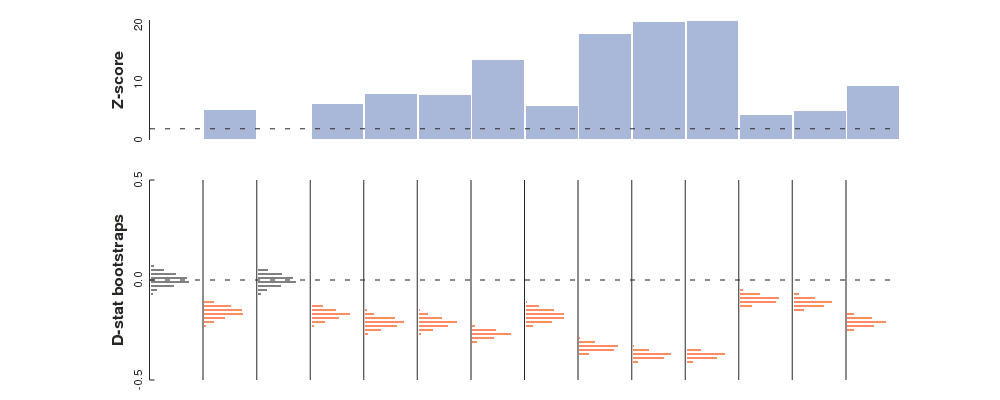

In [36]:
baba.bootplot(res, boots)

In [7]:
test1 = {
    'p4': tree['OG'],
    'p3': tree['K1'],
    'p2': tree['K5'],
    'p1': tree['K6'],
}

test2 = {
    'p4': tree['OG'],
    'p3': tree['K2'],
    'p2': tree['K5'],
    'p1': tree['K6'], 
}

test3 = {
    'p4': tree['OG'],
    'p3': tree['K3'],
    'p2': tree['K5'],
    'p1': tree['K6'], 
}

test4 = {
    'p4': tree['OG'],
    'p3': tree['K4'],
    'p2': tree['K5'],
    'p1': tree['K6'], 
}

## optional: dict for min samples per taxon (default=1 per tax)
## used to filter loci for inclusion in data set
mindict = {
    'p4': 2,
    'p3': 2,
    'p2': 2, 
    'p1': 2,
}

## name these tests0
tests0 = [test0, test1, test2, test3, test4]

In [10]:
## run tests0
results[0], boots[0] = baba.batch(handle, tests, None, 1000, ipyclient)

  [####################] 100%  calculating D-stats  | 0:01:46 |  


In [23]:
print results

      dstat  bootmean   bootstd        ABBA        BABA         Z
0 -0.006065 -0.005433  0.018544  251.342752  254.410076  0.292966
1 -0.085728 -0.084743  0.030092  106.798948  126.827321  2.816162
2 -0.047591 -0.048226  0.031907   94.974609  104.466145  1.511440
3 -0.093270 -0.094585  0.030945   95.542105  115.197775  3.056509
4 -0.039809 -0.040713  0.029956  108.502387  117.499315  1.359065


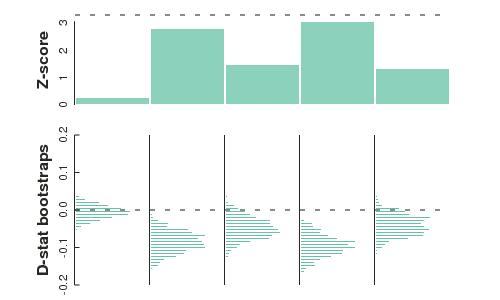

In [21]:
baba.bootplot(results, boots, height=300, width=500, alpha=0.001)

### Tests focused on "SF172"

In [31]:
## assign taxa to tests using dictionaries
SF0 = {
    'p4': tree['OG'],
    'p3': ["SF172"],
    'p2': tree['K5'],
    'p1': tree['K6'],
}

SF1 = {
    'p4': tree['OG'],
    'p3': ["SF172"],
    'p2': tree['K2'] + tree["K3"] + tree["K4"],
    'p1': tree['K5'] + tree["K6"],
}

SF2 = {
    'p4': tree['OG'],
    'p3': ["SF172"],
    'p2': tree['K2'] + tree["K3"] + tree["K4"],
    'p1': tree['K5'],
}

SF3 = {
    'p4': tree['OG'],
    'p3': ["SF172"],
    'p2': tree['K2'] + tree["K3"] + tree["K4"],
    'p1': tree['K6'],
}

SF4 = {
    'p4': tree['OG'],
    'p3': ["SF172"],
    'p2': tree['K2'],
    'p1': tree['K3'],
}

SF5 = {
    'p4': tree['OG'],
    'p3': ["SF172"],
    'p2': tree['K2'],
    'p1': tree['K4'],
}

SF6 = {
    'p4': tree['OG'],
    'p3': ["SF172"],
    'p2': tree['K3'],
    'p1': tree['K4'],
}

## list of tests
tests = [SF0, SF1, SF2, SF3, SF4, SF5, SF6]

In [32]:
## run the batch tests
results, boots = baba.batch(handle, tests, None, 1000, ipyclient)


  [####################] 100%  calculating D-stats  | 0:02:43 |  


In [26]:
print results

      dstat  bootmean   bootstd        ABBA        BABA          Z
0 -0.150919 -0.151405  0.031325   75.907524  102.891626   4.833404
1 -0.213164 -0.214316  0.019102  149.703611  230.816723  11.219811
2 -0.113130 -0.112338  0.029733  107.797974  135.299611   3.778199
3 -0.223003 -0.222992  0.019010  146.361050  230.374065  11.730440
4 -0.114514 -0.114848  0.028189  132.178819  166.366319   4.074132
5  0.011617  0.012017  0.024016  170.585822  166.667940   0.500363
6  0.122198  0.122483  0.023297  171.742245  134.339641   5.257492


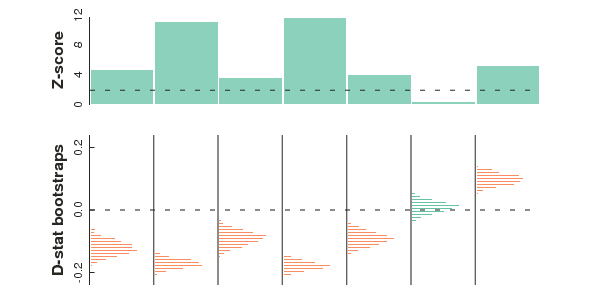

In [27]:
baba.bootplot(results, boots, width=300, height=300)

### Other taxa in K1 instead of SF172

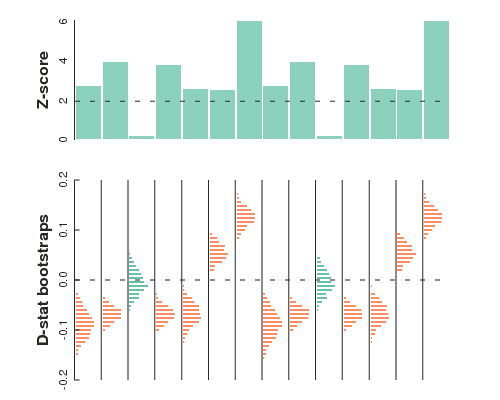

In [39]:
#.shape
baba.bootplot(pd.concat([results, results]), np.concatenate([boots, boots]), width=500)

In [30]:
tests2 = tests
for test in tests2:
    test['p3'] = ["SF328", "SF175", "SF200"]

  [####################] 100%  calculating D-stats  | 0:02:37 |  
      dstat  bootmean   bootstd        ABBA        BABA         Z
0 -0.089298 -0.088529  0.031645   98.951930  118.357093  2.797625
1 -0.068006 -0.068283  0.017059  276.400867  316.738083  4.002779
2 -0.007193 -0.006293  0.027443  140.626023  142.663839  0.229326
3 -0.068516 -0.068579  0.017828  273.557275  313.800604  3.846584
4 -0.066582 -0.067315  0.025429  178.953993  204.484086  2.647211
5  0.053579  0.054187  0.020839  229.623915  206.269054  2.600322
6  0.125489  0.125965  0.020701  242.013947  188.046123  6.084925


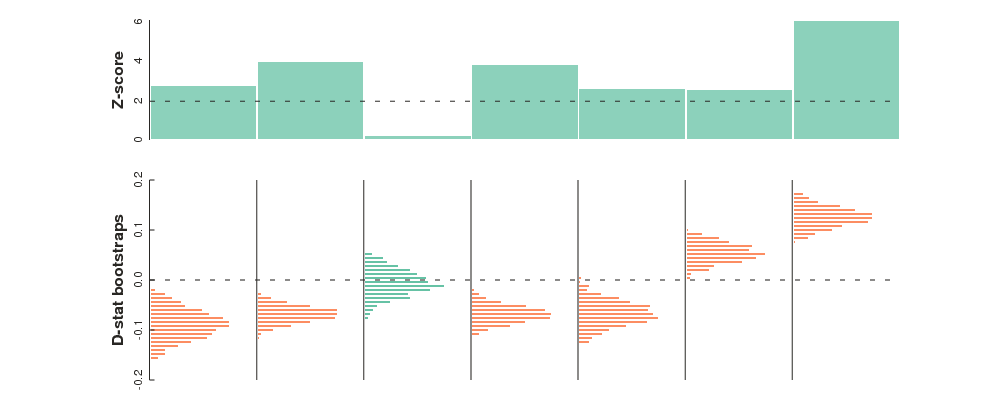

In [31]:
## run the batch tests
results, boots = baba.batch(handle, tests2, None, 1000, ipyclient)

print results
baba.bootplot(results, boots)

In [14]:
res, boots = baba.baba(handle, SF1, None, nboots=1000, name="SF1")
print res
res, boots = baba.baba(handle, SF2, None, nboots=1000, name="SF2")
print res
res, boots = baba.baba(handle, SF3, None, nboots=1000, name="SF3")
print res

                 SF1
dstat      -0.213164
bootmean   -0.212270
bootstd     0.018683
abba      149.703611
baba      230.816723
Z          11.361600
                 SF2
dstat      -0.113130
bootmean   -0.113962
bootstd     0.028797
abba      107.797974
baba      135.299611
Z           3.957495
                 SF3
dstat      -0.223003
bootmean   -0.223204
bootstd     0.019204
abba      146.361050
baba      230.374065
Z          11.622620


In [6]:
res, boots = baba.baba(handle, test1, mindict, nboots=1000, name="test1")
print res

              test1
dstat     -0.009126
bootmean  -0.010033
bootstd    0.036996
abba      53.833046
baba      54.824608
Z          0.271200


In [7]:
res, boots = baba.baba(handle, test2, mindict, nboots=1000, name="test2")
print res

              test2
dstat     -0.005280
bootmean  -0.006596
bootstd    0.042791
abba      47.730486
baba      48.237202
Z          0.154134


In [11]:
res, boots = baba.baba(handle, test3, mindict, nboots=1000, name="test3")
print res

              test3
dstat     -0.010609
bootmean  -0.010787
bootstd    0.040863
abba      49.934528
baba      51.005403
Z          0.263970


In [34]:
res, boots = baba.baba(handle, test4, mindict, nboots=1000, name="test4")
print res

              test4
dstat     -0.005682
bootmean  -0.006316
bootstd    0.039212
abba      51.421502
baba      52.009247
Z          0.161074


### batch process

In [6]:
tests = [test1, test2, test3, test4]

In [30]:
## run tests with mindict=2 or 1
results1, boots1 = baba.batch(handle, tests, mindict, 1000, ipyclient)
results2, boots2 = baba.batch(handle, tests, None, 1000, ipyclient)

  [####################] 100%  calculating D-stats  | 0:00:47 |  
  [####################] 100%  calculating D-stats  | 0:01:18 |  


In [33]:
print results1
print results2

      dstat  bootmean   bootstd       ABBA       BABA         Z
0 -0.009126 -0.007871  0.038301  53.833046  54.824608  0.205494
1 -0.005280 -0.003177  0.041143  47.730486  48.237202  0.077224
2 -0.010609 -0.009403  0.040457  49.934528  51.005403  0.232421
3 -0.005682 -0.005076  0.039680  51.421502  52.009247  0.127915
      dstat  bootmean   bootstd        ABBA        BABA         Z
0 -0.085728 -0.085311  0.029217  106.798948  126.827321  2.919894
1 -0.047591 -0.048038  0.030784   94.974609  104.466145  1.560470
2 -0.093270 -0.092967  0.030826   95.542105  115.197775  3.015903
3 -0.039809 -0.038739  0.028573  108.502387  117.499315  1.355769


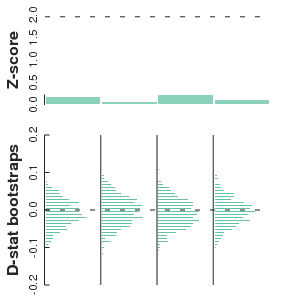

In [31]:
baba.bootplot(results1, boots1, width=300, height=300)

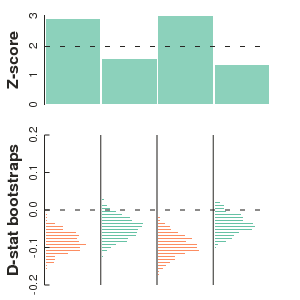

In [32]:
baba.bootplot(results2, boots2, width=300, height=300)

In [20]:
## without mindict
results2, bootsarr2 = baba.batch(handle, tests, nboots=1000, ipyclient=ipyclient)

  [####################] 100%  calculating D-stats  | 0:01:10 |  


In [27]:
print results2

      dstat  bootmean   bootstd        ABBA        BABA         Z
0 -0.085728 -0.086077  0.029503  106.798948  126.827321  2.917614
1 -0.047591 -0.045864  0.031194   94.974609  104.466145  1.470268
2 -0.093270 -0.092082  0.029866   95.542105  115.197775  3.083180
3 -0.039809 -0.039693  0.029554  108.502387  117.499315  1.343082


In [ ]:
#

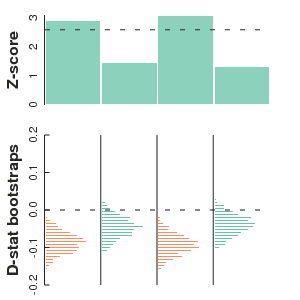

In [28]:
baba.bootplot(results2, bootsarr2, width=300, height=300, alpha=0.01)

In [6]:
arr, keep = baba._loci_to_arr(handle, test4, mindict)
arr.shape

(16744, 4, 10)

In [7]:
print arr[1, :, :5]
print np.where(keep)

a1 = ((1.-arr[:, 0]) * (arr[:, 1]) * (arr[:, 2]) * (1.-arr[:, 3]))  
a2 = ((arr[:, 0]) * (1.-arr[:, 1]) * (arr[:, 2]) * (1.-arr[:, 3]))

[[ 1.          1.          0.33333333  1.          0.95454545]
 [ 1.          0.5         1.          1.          1.        ]
 [ 0.83333333  1.          1.          0.83333333  1.        ]
 [ 1.          1.          1.          1.          1.        ]]
(array([    23,     30,     32, ..., 155246, 155263, 155264]),)


In [8]:
a,b,c = baba._prop_dstat(arr)
bb = baba._get_boots(arr, 100)
e,s = (bb.mean(), bb.std())
z = np.abs(e) / s
stats = np.array([c, e, s, z])


In [15]:
#res, boots = baba.baba(arr, test4)
print pd.DataFrame(res, columns=None,
                   index=["D", "bootmean", "bootstd", "abba", "baba", "Z"])

                  0
D         -0.005682
bootmean  -0.008246
bootstd    0.038005
abba      51.421502
baba      52.009247
Z          0.216962


In [21]:
abba = ((1.-arr[:, 0]) * (arr[:, 1]) * (arr[:, 2]) * (1.-arr[:, 3]))  
baba = ((arr[:, 0]) * (1.-arr[:, 1]) * (arr[:, 2]) * (1.-arr[:, 3]))
top = abba - baba
bot = abba + baba

## get statistic and avoid zero div   
if bot.sum() != 0:
    dstat = top.sum() / float(bot.sum())
else:
    dstat = 0
    
top.sum(), bot.sum(), dstat

(-0.58774438428084008, 103.43074882389988, -0.0056824918214749423)

In [22]:
baba._prop_dstat(arr)

AttributeError: 'numpy.ndarray' object has no attribute '_prop_dstat'

In [8]:
marr = masknulls(arr)
marr.shape

TypingError: Caused By:
Traceback (most recent call last):
  File "/home/deren/miniconda2/lib/python2.7/site-packages/numba/compiler.py", line 228, in run
    stage()
  File "/home/deren/miniconda2/lib/python2.7/site-packages/numba/compiler.py", line 442, in stage_nopython_frontend
    self.locals)
  File "/home/deren/miniconda2/lib/python2.7/site-packages/numba/compiler.py", line 793, in type_inference_stage
    infer.build_constraint()
  File "/home/deren/miniconda2/lib/python2.7/site-packages/numba/typeinfer.py", line 723, in build_constraint
    self.constrain_statement(inst)
  File "/home/deren/miniconda2/lib/python2.7/site-packages/numba/typeinfer.py", line 882, in constrain_statement
    self.typeof_assign(inst)
  File "/home/deren/miniconda2/lib/python2.7/site-packages/numba/typeinfer.py", line 940, in typeof_assign
    self.typeof_global(inst, inst.target, value)
  File "/home/deren/miniconda2/lib/python2.7/site-packages/numba/typeinfer.py", line 1034, in typeof_global
    typ = self.resolve_value_type(inst, gvar.value)
  File "/home/deren/miniconda2/lib/python2.7/site-packages/numba/typeinfer.py", line 959, in resolve_value_type
    raise TypingError(msg, loc=inst.loc)
TypingError: Untyped global name 'marr': cannot determine Numba type of <type 'object'>
File "<ipython-input-7-db9cde634722>", line 3

Failed at nopython (nopython frontend)
Untyped global name 'marr': cannot determine Numba type of <type 'object'>
File "<ipython-input-7-db9cde634722>", line 3

In [91]:
@numba.jit(nopython=True)
def mask9s(arr):
    ## which columns 
    for loc in xrange(arr.shape[0]):
        for site in xrange(arr.shape[2]):
            ## mask cols with 9s
            if np.any(arr[loc, :, site] == 9):
                arr[loc, :, site] = 0 
            ## get nvars
            
    return arr

In [9]:
@numba.jit(nopython=True)
def masknulls(arr):
    nvarr = np.zeros(arr.shape[0], dtype=np.int8)
    trimarr = np.zeros(arr.shape, dtype=np.float64)
    for loc in xrange(arr.shape[0]):
        nvars = 0
        for site in xrange(arr.shape[2]):
            col = arr[loc, :, site]
            ## mask cols with 9s
            if not np.any(col == 9):
                ## any non-outgroup shows variation?
                ## todo: check whether BBBBA is ever info?
                if np.any(col[:-1] != col[0]):
                    #print col
                    trimarr[loc, :, nvars] = col
                    #print trimarr[loc, :, nvars]
                    nvars += 1
        nvarr[loc] = nvars        
    return trimarr[:, :, :nvarr.max()]
    

marr = masknulls(arr)
marr.shape

(16744, 4, 10)

In [137]:
arr[0, :, :10]

## mask any column with a 9 to be all zeros
marr = mask9s(arr)

for 

## find maxlen SNPs
#colmask = np.any(marr != marr[:, 0, :], axis=2)
marr[:, :] == marr[:, 0]
#colmask[1]
#print marr[1, :, colmask[1]]

/home/deren/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


False

In [111]:
inv = np.invert(colmask).sum(axis=1)
print inv.max()
np.where(inv == 71)
#np.who(inv == 84)
#arr[6513, ]
arr[11894]

4


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.88888889,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1. 

In [9]:
np.where(keep)[0][:10]

array([ 23,  30,  32,  53,  54,  73,  98, 111, 116, 122])

In [98]:
def _reffreq(ancestral, iseq, consdict):
    ## empty arrays
    freq = np.zeros((1, iseq.shape[1]), dtype=np.float64)
    amseq = np.zeros((iseq.shape[0]*2, iseq.shape[1]), dtype=np.uint8)
    
    ## fill in both copies
    for seq in xrange(iseq.shape[0]):
        for col in xrange(iseq.shape[1]):  

            ## expand colums with ambigs and remove N-
            base = iseq[seq][col]
            who = consdict[:, 0] == base
            
            ## resolve heteros and enter into 
            if not np.any(who):
                amseq[seq*2][col] = base
                amseq[seq*2+1][col] = base        
            else:
                amseq[seq*2][col] = consdict[who, 1][0]
                amseq[seq*2+1][col] = consdict[who, 2][0]

    ## get as frequencies
    amseq = (ancestral == amseq).astype(np.float64)
    for i in xrange(amseq.shape[0]):
        freq += amseq[i]   
    return freq / np.float64(amseq.shape[0])


_reffreq(a, r, GETCONS2)

array([[ 0.8,  0. ,  0.6,  0. ,  0. ,  1. ,  1. ,  0. ,  0. ]])

In [125]:
## with N and - masked to 9
GETCONS2 = np.array([[82, 71, 65],
                     [75, 71, 84],
                     [83, 71, 67],
                     [89, 84, 67],
                     [87, 84, 65],
                     [77, 67, 65],
                     [78, 9, 9],
                     [45, 9, 9]], dtype=np.uint8)


In [149]:
@numba.jit(nopython=True)
def _reffreq3(ancestral, iseq, consdict):
    ## empty arrays
    freq = np.zeros((1, iseq.shape[1]), dtype=np.float64)
    amseq = np.zeros((iseq.shape[0]*2, iseq.shape[1]), dtype=np.uint8)
    
    ## fill in both copies
    for seq in xrange(iseq.shape[0]):
        for col in xrange(iseq.shape[1]):  

            ## get this base and check if it is hetero
            base = iseq[seq][col]
            who = consdict[:, 0] == base
            
            ## if not hetero then enter it
            if not np.any(who):
                amseq[seq*2][col] = base
                amseq[seq*2+1][col] = base        
            ## if hetero then enter the 2 resolutions
            else:
                amseq[seq*2][col] = consdict[who, 1][0]
                amseq[seq*2+1][col] = consdict[who, 2][0]

    ## amseq may have N or -, these need to be masked
    for i in xrange(amseq.shape[1]):
        ## mask sites (9) that do not have proper site coverage
        reduced = amseq[:, i][amseq[:, i] != 9]
        counts = reduced == ancestral[0][i]
        if reduced.shape[0]:
            freq[:, 1] = counts.sum() / reduced.shape[0]
        else:
            freq[:, 1] = 9
    return freq


print _reffreq3(a, i, GETCONS2)
print _reffreq3(a, j, GETCONS2)
print _reffreq3(a, k, GETCONS2)
print _reffreq3(a, l, GETCONS2)


[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [152]:
@numba.jit(nopython=True)
def _reffreq2(ancestral, iseq, consdict):
    ## empty arrays
    freq = np.zeros((1, iseq.shape[1]), dtype=np.float64)
    amseq = np.zeros((iseq.shape[0]*2, iseq.shape[1]), dtype=np.uint8)
    
    ## fill in both copies
    for seq in xrange(iseq.shape[0]):
        for col in xrange(iseq.shape[1]):  

            ## get this base and check if it is hetero
            base = iseq[seq][col]
            who = consdict[:, 0] == base
            
            ## if not hetero then enter it
            if not np.any(who):
                amseq[seq*2][col] = base
                amseq[seq*2+1][col] = base        
            ## if hetero then enter the 2 resolutions
            else:
                amseq[seq*2][col] = consdict[who, 1][0]
                amseq[seq*2+1][col] = consdict[who, 2][0]

    ## amseq may have N or -, these need to be masked
    for i in xrange(amseq.shape[1]):
        ## without N or -
        reduced = amseq[:, i][amseq[:, i] != 9]
        counts = reduced == ancestral[0][i]
        if reduced.shape[0]:
            freq[:, i] = counts.sum() / reduced.shape[0]
        else:
            freq[:, i] = 9
    return freq

print _reffreq2(a, i, GETCONS2)
print _reffreq2(a, j, GETCONS2)
print _reffreq2(a, k, GETCONS2)
print _reffreq2(a, l, GETCONS2)

[[ 1.  0.  1.  9.  9.  1.  1.  0.  0.]]
[[ 1.  0.  1.  0.  0.  1.  1.  0.  0.]]
[[ 1.  9.  9.  0.  0.  1.  1.  0.  0.]]
[[ 1.  0.  1.  0.  0.  1.  1.  0.  0.]]


In [153]:
@numba.jit(nopython=True)
def _reffreq4(ancestral, iseq, consdict):
    ## empty arrays
    freq = np.zeros((1, iseq.shape[1]), dtype=np.float64)
    amseq = np.zeros((iseq.shape[0]*2, iseq.shape[1]), dtype=np.uint8)
    
    ## fill in both copies
    for seq in xrange(iseq.shape[0]):
        for col in xrange(iseq.shape[1]):  

            ## get this base and check if it is hetero
            base = iseq[seq][col]
            who = consdict[:, 0] == base
            
            ## if not hetero then enter it
            if not np.any(who):
                amseq[seq*2][col] = base
                amseq[seq*2+1][col] = base        
            ## if hetero then enter the 2 resolutions
            else:
                amseq[seq*2][col] = consdict[who, 1][0]
                amseq[seq*2+1][col] = consdict[who, 2][0]

    ## amseq may have N or -, these need to be masked
    for i in xrange(amseq.shape[1]):
        ## without N or -
        reduced = amseq[:, i][amseq[:, i] != 9]
        counts = reduced == ancestral[0][i]
        if reduced.shape[0]:
            freq[:, i] = counts.sum() / reduced.shape[0]
        else:
            freq[:, i] = 9
    return freq

print _reffreq4(a, i, GETCONS2)
print _reffreq4(a, j, GETCONS2)
print _reffreq4(a, k, GETCONS2)
print _reffreq4(a, l, GETCONS2)

[[ 1.  0.  1.  9.  9.  1.  1.  0.  0.]]
[[ 1.  0.  1.  0.  0.  1.  1.  0.  0.]]
[[ 1.  9.  9.  0.  0.  1.  1.  0.  0.]]
[[ 1.  0.  1.  0.  0.  1.  1.  0.  0.]]


In [95]:
freq = np.zeros((1, r.shape[1]), dtype=np.float64)
amseq = np.zeros((r.shape[0]*2, r.shape[1]), dtype=np.uint8)

## fill in both copies
for seq in xrange(r.shape[0]):
    for col in xrange(r.shape[1]):  

        ## expand colums with ambigs and remove N-
        base = r[seq][col]
        who = GETCONS2[:, 0] == base

        ## resolve heteros and enter into 
        if not np.any(who):
            amseq[seq*2][col] = base
            amseq[seq*2+1][col] = base        
        else:
            amseq[seq*2][col] = GETCONS2[who, 1][0]
            amseq[seq*2+1][col] = GETCONS2[who, 2][0]
            
        #print base, who
        
## convert ancestral -N to other
#a[a==45] = 0
#a[a==78] = 0
print r, 'r'
print a, 'a'
print amseq == a[0]
#amseq = (a == amseq).astype(np.float64)
#print amseq

for i in xrange(amseq.shape[1]):
    print amseq[:, i], 'j'
    j = amseq[:, i]
    who = j != 9
    k = j[who]
    print k, 'k'
    print a[i], 'a'
    print a[0][i]#[who], 'l'

#for i in xrange(amseq.shape[0]):
#    freq += amseq[i]
#    print amseq[i], 'i'
print freq / np.float64(amseq.shape[0])

[[65 65 65 78 78 65 65 87 87]
 [65 65 65 65 65 65 65 84 84]
 [78 78 78 78 65 65 65 84 84]
 [65 45 45 65 84 65 65 84 65]
 [65 65 65 65 65 65 65 65 65]] r
[[65  0 65  0  0 65 65 87 87]] a
[[ True False  True False False  True  True False False]
 [ True False  True False False  True  True False False]
 [ True False  True False False  True  True False False]
 [ True False  True False False  True  True False False]
 [False False False False False  True  True False False]
 [False False False False False  True  True False False]
 [ True False False False False  True  True False False]
 [ True False False False False  True  True False False]
 [ True False  True False False  True  True False False]
 [ True False  True False False  True  True False False]]
[65 65 65 65  9  9 65 65 65 65] j
[65 65 65 65 65 65 65 65] k
[65  0 65  0  0 65 65 87 87] a
65
[65 65 65 65  9  9  9  9 65 65] j
[65 65 65 65 65 65] k


IndexError: index 1 is out of bounds for axis 0 with size 1

In [110]:
a = np.array([list("A-ANNAAWW")]).view(np.uint8)

i = np.array([list("AAANNAAWW")]).view(np.uint8)
j = np.array([list("AAAAAAATT"), 
              list("NNNNAAATT")]).view(np.uint8)
k = np.array([list("A--ATAATA")]).view(np.uint8)
l = np.array([list("AAAAAAAAA")]).view(np.uint8)
r = np.concatenate([i,j,k,l])
print a
print r
print GETCONS.view("S1")

_reffreq(a, r, GETCONS)


[[65 45 65 78 78 65 65 87 87]]
[[65 65 65 78 78 65 65 87 87]
 [65 65 65 65 65 65 65 84 84]
 [78 78 78 78 65 65 65 84 84]
 [65 45 45 65 84 65 65 84 65]
 [65 65 65 65 65 65 65 65 65]]
[['R' 'G' 'A']
 ['K' 'G' 'T']
 ['S' 'G' 'C']
 ['Y' 'T' 'C']
 ['W' 'T' 'A']
 ['M' 'C' 'A']]


array([[ 0.8,  0.2,  0.6,  0.4,  0.2,  1. ,  1. ,  0. ,  0. ]])

In [26]:
aa = np.array([reftrick(a, GETCONS)[:, 0]])
aa

array([[65, 65, 65,  0,  0, 65, 65, 65, 65]], dtype=uint8)

In [27]:
np.array([r])

array([[[65, 65, 65, 78, 78, 65, 65, 87, 87],
        [65, 65, 65, 65, 65, 65, 65, 84, 84],
        [78, 78, 78, 78, 65, 65, 65, 84, 84],
        [65, 65, 65, 65, 84, 65, 65, 84, 65],
        [65, 65, 65, 65, 65, 65, 65, 65, 65]]], dtype=uint8)

In [28]:
for rr in r:
    print _reffreq(aa, np.array([rr]), GETCONS)

[[ 1.   1.   1.   0.   0.   1.   1.   0.5  0.5]]
[[ 1.  1.  1.  0.  0.  1.  1.  0.  0.]]
[[ 0.  0.  0.  0.  0.  1.  1.  0.  0.]]
[[ 1.  1.  1.  0.  0.  1.  1.  0.  1.]]
[[ 1.  1.  1.  0.  0.  1.  1.  1.  1.]]


In [22]:
print ancestral
print refseq

print GETCONS#.view("S1")

[[84 84 84 67 84 84 65 67 65 84 65 65 67 71 67 67 65 65 71 71 65 71 71 84
  84 84 67 84 84 71 65 84 67 67 65 84 65 84 67 84 71 71 65 71 71 84 65 84
  84 71 67 84 67 84 67 65 65 84 84 84 67]]
[[84 84 84 67 84 84 65 67 65 84 65 65 67 71 67 67 65 65 71 71 65 71 71 84
  84 84 67 84 84 71 65 84 67 67 65 84 65 84 67 84 71 71 65 71 71 84 65 84
  84 71 67 84 67 84 67 65 65 84 84 84 67]
 [84 84 84 67 84 84 65 67 65 84 65 65 67 71 67 67 65 65 71 71 65 71 71 84
  84 84 67 84 84 71 65 84 67 67 65 84 65 84 67 84 71 71 65 71 71 84 65 84
  84 71 67 84 67 84 67 65 65 84 84 84 67]]
[[82 71 65]
 [75 71 84]
 [83 71 67]
 [89 84 67]
 [87 84 65]
 [77 67 65]]


In [21]:
locifile = handle
taxdict = test4

from ipyrad.analysis.baba import *
import ipyrad.analysis.baba as baba

## read in the input file
with open(locifile, 'r') as infile:
    loci = infile.read().strip().split("|\n")
    nloci = len(loci)

## get max loc length
maxlen = 0
for iloc in xrange(nloci):
    lines = loci[iloc].split("\n")[:-1]
    _maxl = len(lines[0]) 
    maxlen = max(maxlen, _maxl)

## make the array (4 or 5) and a mask array to remove loci without cov
arr = np.zeros((nloci, len(taxdict), maxlen), dtype=np.float64)
keep = np.zeros(nloci, dtype=np.bool_)

## if not mindict, make one that requires 1 in each taxon
if not mindict:
    mindict = {i:1 for i in taxdict}

## raise error if names are not 'p[int]' 
allowed_names = ['p1', 'p2', 'p3', 'p4', 'p5']
if any([i not in allowed_names for i in taxdict]):
    raise NameError("keys in taxdict must be named 'p1' through 'p4' or 'p5'")

## parse key names
keys = sorted([i for i in taxdict.keys() if i[0] == 'p'])
outg = keys[-1]

## grab seqs just for the good guys
for loc in xrange(50):  

    ## parse the locus
    lines = loci[loc].split("\n")[:-1]
    names = [i.split()[0] for i in lines]
    seqs = np.array([list(i.split()[1]) for i in lines])

    ## check that names cover the taxdict
    covs = [sum([j in names for j in taxdict[tax]]) >= mindict[tax] \
            for tax in taxdict]
    
    if all(covs):
        ## keep locus
        keep[loc] = True

        ## get the refseq 
        ref = np.where([i in taxdict[outg] for i in names])[0]
        refseq = seqs[ref].view(np.uint8)
        ancestral = np.array([reftrick(refseq, GETCONS)[:, 0]])
        #print refseq
        #print ancestral
        
        ## and fill it in for the outgroup
        iseq = baba._reffreq(ancestral, refseq, GETCONS)
        arr[loc, -1, :iseq.shape[1]] = iseq 
        print iseq

        ## fill each other tax freq in taxdict
        for tidx, key in enumerate(keys[:-1]):

            ## get idx of names in test tax
            nidx = np.where([i in taxdict[key] for i in names])[0]
            sidx = seqs[nidx].view(np.uint8)
            ## get freq of sidx
            iseq = baba._reffreq(ancestral, sidx, GETCONS)
            ## fill it in 
            print iseq
            arr[loc, tidx, :iseq.shape[1]] = iseq
        print ""

[[ 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
   1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
   1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
   1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
   1.     1.     1.     1.     1.     0.875  1.     1.     1.     1.     1.
   1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
   1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
   1.     1.     0.75   1.     1.     0.625  1.     0.75   1.   ]]
[[ 0.7   0.7   0.7   0.7   0.7   0.7   0.6   0.7   0.7   0.7   0.7   0.7
   0.7   0.7   0.7   0.7   0.7   0.7   0.7   0.7   0.8   0.9   1.    1.    1.
   1.    1.    1.    1.    1.    0.9   1.    1.    1.    1.    0.95  1.    1.
   1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
   1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
   1.    1.    1

In [19]:
keep.shape

(155268,)

In [14]:
arr[0, :10, :100]

array([[ 0.7  ,  0.7  ,  0.7  ,  0.7  ,  0.7  ,  0.7  ,  0.6  ,  0.7  ,
         0.7  ,  0.7  ,  0.7  ,  0.7  ,  0.7  ,  0.7  ,  0.7  ,  0.7  ,
         0.7  ,  0.7  ,  0.7  ,  0.7  ,  0.8  ,  0.9  ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  0.9  ,  1.   ,
         1.   ,  1.   ,  1.   ,  0.95 ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  0.8  ,  0.8  ,  0.8  ,  0.8  ,  0.8  ,
         0.75 ,  0.8  ,  0.8  ,  0.8  ,  0.8  ,  0.8  ,  0.8  ,  0.8  ,
         0.8  ,  0.8  ,  0.8  ,  0.8  ,  0.8  ,  0.8  ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,

### Run tests

In [9]:
## run the test
resarr, bootsarr = baba.batch(handle, [test1, test2, test3, test4], mindict, 5000, ipyclient)

  [####################] 100%  calculating D-stats  | 2:22:14 |  


### Plot bootstrap results & significance

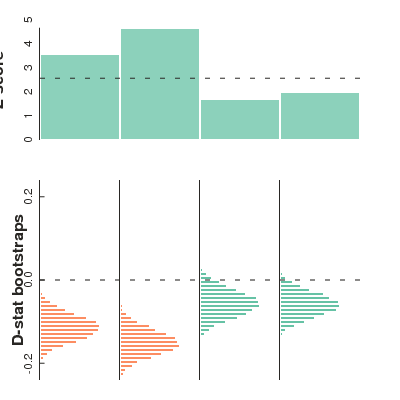

In [34]:
## plots with defaults
bootplot(resarr, bootsarr, alpha=0.01, width=400, height=400)

### Setup K2 -> (K3, K4)

In [31]:
## a dictionary with [required] key names 
## optional: additional 'p4' key for 5-taxon tests.
test1 = {
    'p4': tree['OG'],
    'p3': tree['K1'],
    'p2': tree['K5'],
    'p1': tree['K6'],
}

test2 = {
    'p4': tree['OG'],
    'p3': tree['K2'],
    'p2': tree['K5'],
    'p1': tree['K6'], 
}

test3 = {
    'p4': tree['OG'],
    'p3': tree['K3'],
    'p2': tree['K5'],
    'p1': tree['K6'], 
}

test4 = {
    'p4': tree['OG'],
    'p3': tree['K4'],
    'p2': tree['K5'],
    'p1': tree['K6'], 
}

## optional: dict for min samples per taxon (default=1 per tax)
## used to filter loci for inclusion in data set
mindict = {
    'p4': 2,
    'p3': 2,
    'p2': 2, 
    'p1': 2,
}

In [22]:
from ipyrad.analysis.baba import *

def bootplot(resarr, bootarr, alpha=0.05, *args, **kwargs):
    """
    plot the distribution of bootstrap replicates and significance
    """
    ## grab/update settable defaults
    args = {"height": 400, 
            "width": 1000, 
            "label-font-size": "16px", 
            "tick-font-size": "12px"}
    args.update(kwargs)

    ## storage for all the data
    cutoff = st.norm.ppf(1-(alpha)/2) ## 1.96 for 0.05
    ntests = resarr.shape[0]
    xlines = np.zeros(ntests)

    ## get borders canvas
    canvas = toyplot.Canvas(height=args['height'], width=args['width'])
    bmin = canvas.height * 0.05
    bmax = canvas.height * 0.35
    hmin = canvas.height * 0.45
    hmax = canvas.height * 0.95
    wmin = canvas.width * 0.1
    wmax = canvas.width * 0.9

    ## space between plots (min 50)
    xlines = np.linspace(wmin, wmax, ntests+1)
    spacer = 0.75 * (xlines[1] - xlines[0])
    
    ## get line plot scale
    rmax = np.max(np.abs(bootarr))
    rmax = round(min(1.0, max(0.2, rmax+0.1*rmax)), 1)
    rmin = round(max(-1.0, min(-0.2, -1 * rmax)), 1)
    
    ## add the rest
    for idx in xrange(ntests):
        ## new data
        res = resarr[idx]
        boot = bootarr[idx]
        hist = np.histogram(boot, bins=50, range=(rmin, rmax), density=True)
        
        ## get p-value from z-score 
        sign = res[3] > cutoff
        
        ## next axes
        dims = (xlines[idx], xlines[idx]+spacer, hmin, hmax)
        axes = canvas.cartesian(bounds=dims)
        axes.bars(hist, along='y', color=toyplot.color.Palette()[sign])

        ## style leftmost edge
        if idx == 0:
            ## add histograms y-label
            axes.y.label.text = "D-stat bootstraps"
            axes.y.label.style = {"font-size": args['label-font-size'],
                                  "fill": toyplot.color.near_black}
            axes.y.label.offset = wmin / 2. ## 40

            ## axes style
            axes.y.ticks.show = True
            axes.y.ticks.labels.style = {"font-size": args['tick-font-size']}
            axes.y.ticks.labels.offset = 10
        else:        
            ## styling left most
            axes.y.ticks.show = False
            axes.y.ticks.labels.show = False

        ## shared axis style
        axes.x.show = False
        axes.padding = 0.5

    ## add dash through histograms
    dims = (xlines[0], xlines[-1], hmin, hmax)# canvas.height)
    axes = canvas.cartesian(bounds=dims)
    axes.hlines(y = 0, style={"stroke-dasharray": "5, 10"})
    axes.show = False

    ## add bar plots
    dims = (xlines[0], xlines[-1], bmin, bmax)
    axes = canvas.cartesian(bounds=dims)
    axes.bars(xlines[1:], resarr[:, 3], opacity=0.75)

    ## bars axis styling
    axes.padding = 0.5
    axes.y.ticks.labels.offset = 10
    axes.y.ticks.labels.style = {"font-size": args['tick-font-size']}
    axes.x.show = False#True
    axes.hlines(y = cutoff, style={"stroke-dasharray": "5, 10"})
    
    ## bars y-label
    axes.y.label.text = "Z-score"
    axes.y.label.offset = 40
    axes.y.label.style = {"font-size": args['label-font-size'],
                          "fill": toyplot.color.near_black}

    return canvas

### Run parallel tests

In [ ]:
## parallel code on a batch of tests
baba.batch(handle, [test, test, test], mindict=mindict, ipyclient=None)



In [ ]:
array([ 0.14254378,  0.14365922,  0.04219869,  3.37791941])

In [7]:
## run test
async1 = lbview.apply(baba.baba, *(handle, test, mindict, 100))

In [8]:
async1.result()

RemoteError: AttributeError('function' object has no attribute 'loci_to_arr')

In [6]:
## a dictionary with [required] key names 
test = {
    'p4': tree['OG'],
    'p3': tree['K1'], 
    'p2': tree['K2'] + tree['K3'] + tree['K4'],
    'p1': tree['K6'],
}

mindict = {
    'p4': 2,
    'p3': 2,
    'p2': 2, 
    'p1': 2,
}

## get array
arr = baba.loci_to_arr(handle, test)
res2 = baba.get_signif(arr, 10000)
print res2

[-0.2387490157638179, -0.23888143621131794, 0.01665133790381427, 14.338128091745014]


In [7]:
## a dictionary with [required] key names 
test = {
    'p4': tree['OG'],
    'p3': tree['K1'], 
    'p2': tree['K2'] + tree['K3'] + tree['K4'],
    'p1': tree['K5'],
}

mindict = {
    'p4': 2,
    'p3': 2,
    'p2': 2, 
    'p1': 2,
}

## get array
arr = baba.loci_to_arr(handle, test)
res2 = baba.get_signif(arr, 10000)
print res2

[0.02540979253823612, 0.024998063311038956, 0.02826023951920838, 0.8991357812436507]


In [22]:
## a dictionary with [required] key names 
test = {
    'p4': tree['OG'],
    'p3': [i for i in tree["K1"] if i != 'SF172'],
    'p2': tree['K2'] + tree['K3'] + tree['K4'],
    'p1': tree['K6'],
}

mindict = {
    'p4': 2,
    'p3': 2,
    'p2': 2, 
    'p1': 2,
}

## get array
arr = baba.loci_to_arr(handle, test)
res2 = baba.get_signif(arr, 10000)
print res2

[-0.22153054321428706, -0.22239622133452983, 0.016776080981297126, 13.205142694605563]


In [23]:
## a dictionary with [required] key names 
test = {
    'p4': tree['OG'],
    'p3': ["SF172"], 
    'p2': tree['K2'] + tree['K3'] + tree['K4'],
    'p1': tree['K6'],
}

mindict = {
    'p4': 2,
    'p3': 1,
    'p2': 2, 
    'p1': 2,
}

## get array
arr = baba.loci_to_arr(handle, test)
res2 = baba.get_signif(arr, 10000)
print res2

[-0.2933802636101344, -0.293262184947965, 0.02018397174547735, 14.535308873283206]


In [24]:
## a dictionary with [required] key names 
test = {
    'p4': tree['OG'],
    'p3': tree['K6'] + tree['K5'],
    'p2': tree['K1'][:3],
    'p1': tree['K1'][3:],
}

mindict = {
    'p4': 2,
    'p3': 2,
    'p2': 2, 
    'p1': 2,
}

## get array
arr = baba.loci_to_arr(handle, test, mindict)
res2 = baba.get_signif(arr, 10000)
print res2

[0.12887254591532105, 0.12942738958041283, 0.024611563998153622, 5.236259911194151]


In [ ]:
## a dictionary with [required] key names 
test = {
    'p4': tree['OG'],
    'p3': tree['K1'], 
    'p2': tree['K2'] + tree['K3'] + tree['K4'],
    'p1': tree['K5'],
}

mindict = {
    'p4': 2,
    'p3': 2,
    'p2': 2, 
    'p1': 2,
}

## get array
arr = baba.loci_to_arr(handle, test)
res2 = baba.get_signif(arr, 10000)
print res2

In [6]:
## get array
arr = baba.loci_to_arr(handle, test)
res1 = baba.get_signif(arr, 10000)
print res1

[-0.17739479225431568, -0.17687652092953904, 0.029086034220501066, 6.098968010196465]


In [11]:
## get array
arr = baba.loci_to_arr(locifile, test)
o, e, s, z = baba.get_signif(arr, 10000)
print o, e, s, z

-0.180109032302 -0.181624769697 0.0308817506656 5.83221573973


#### Test K2 -> (K6, K5)

In [22]:
## setup test
test2 = {
    'p1': tree['K6'],
    'p2': tree['K5'],
    'p3': tree['K2'],
    'out': tree['out']
}
## filter by coverage
mindict = {
    'p1': 2,
    'p2': 2,
    'p3': 2, 
    'out': 2,
}
## build array
arr2 = baba.loci_to_arr(locifile, test2, mindict)

In [25]:
res2 = baba.get_signif(arr2, 10000)
print res2

(-0.17951424722439635, -0.1797070188975458, 0.04037994576752955, 4.44562873506254)


In [75]:
print arr2.shape
print np.all(arr2 == 0, axis=0).shape
print np.all(arr2 == 0, axis=1).shape
print np.all(arr2 == 0, axis=2).shape

## remove empty loci
who = np.all(np.all(arr2==0, axis=2), axis=1)
sarr2 = arr2[~who]

(48972, 4, 120)
(4, 120)
(48972, 120)
(48972, 4)


In [83]:
## remove empty colsm
maxlen = np.all(np.all(sarr2==0, axis=1), axis=0)
maxlen = np.where(maxlen)[0].min()
sarr2 = sarr2[:, :, :maxlen]
sarr2.shape

(15696, 4, 107)

### Summarize results

In [32]:
summ = pd.DataFrame(list(res2),
                    columns=["test2"],
                    index=["D", "Dm", "stdev", "Z"])
print summ

          test2
D     -0.179514
Dm    -0.179707
stdev  0.040380
Z      4.445629


In [29]:
summ = pd.DataFrame([o,e,s,z],
                    columns=["test1"],
                    index=["D", "Dm", "stdev", "Z"])
print summ

          test1
D     -0.180109
Dm    -0.181625
stdev  0.030882
Z      5.832216


## 5-part tests

#### Test1: K1 -> (K2, K3)
Compare different sets of K1 against each other. 

+ What is the deal with SF172?  
+ 4-taxon test says K1 <-> K3 (they are sympatric along East coast), whereas K2 is in the North and west.  


In [ ]:
## setup test
sub1 = []
sub2 = []

## 
test2 = {
    'p1': tree['K6'],
    'p2': tree['K5'],
    'p3': tree['K1'][sub1],
    'p4': tree['K1'][sub2],
    'out': tree['out']
}

## filter by coverage
mindict = {
    'p1': 2,
    'p2': 2,
    'p3': 2, 
    'out': 2,
}

## build array
arr2 = baba.loci_to_arr(locifile, test2, mindict)

### Test2: Just the northern species. 

+ What is happening in the north?
+ 4-taxon test says: a little bit, mostly between 'multis'

### Test3 (A): Is (compressum, longistipulatum) a hybrid artifact?

+ Gene flow with northern taxa?  
+ Different pattern from K6?